In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

In [3]:
with zipfile.ZipFile("/content/drive/My Drive/5_projects/classify_handwritten_letters/letters.zip", 'r') as zip_ref:
    zip_ref.extractall("handwritten_letters")

In [4]:
import os
import pandas as pd
from PIL import Image
import numpy as np

In [5]:
dataset_path = "handwritten_letters"  # Folder where images are stored

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
# Define dataset path
data_path = "/content/drive/My Drive/5_projects/classify_handwritten_letters/handwritten_letters/letters/"

In [9]:
# Function to extract label from filename (modify based on actual dataset format)

def extract_label(filename):
    return filename.split("_")[-1][0] # Example: Extract 'A' from '01_04_00_A.png'

In [27]:
# Load images and labels
image_path = os.listdir(data_path)
x, y = [], []

for img_name in image_path:
    img_path = os.path.join(data_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))  # Resize to standard size
    img = img / 255.0
    x.append(img)
    y.append(extract_label(img_name))


In [28]:
print(np.array(x).shape)

(10903, 32, 32)


In [29]:
# Convert to numpy arrays
x = np.array(x).reshape(-1, 32, 32, 1)
unique_labels = sorted(set(y))  # Get unique character labels
label_map = {char: idx for idx, char in enumerate(unique_labels)}  # Map labels to numbers
y = np.array([label_map[label] for label in y])
y = to_categorical(y, num_classes=len(unique_labels))

In [30]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Build CNN Model

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(unique_labels), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# train Model

epochs = 10
batch_size = 32
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7376 - loss: 0.9200 - val_accuracy: 0.7575 - val_loss: 0.8131
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7544 - loss: 0.7896 - val_accuracy: 0.7593 - val_loss: 0.6717
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7898 - loss: 0.6074 - val_accuracy: 0.8235 - val_loss: 0.5396
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8201 - loss: 0.5147 - val_accuracy: 0.8276 - val_loss: 0.4930
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8316 - loss: 0.4651 - val_accuracy: 0.8249 - val_loss: 0.4486
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8355 - loss: 0.4201 - val_accuracy: 0.8386 - val_loss: 0.4140
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8461 - loss: 0.4027 - val_accuracy: 0.8409 - val_loss: 0.3969
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8461 - loss: 0.4016 - val_accuracy: 0

In [36]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.3630
Test accuracy: 0.8441082239151001
Test Loss: 0.38012611865997314


In [35]:
# Save model
model.save("handwritten_letters_model.h5")

In [57]:
# Make Predictions
predictions = model.predict(x_test[:25])  # Predict on the first 5 images
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
[[9.95090961e-01 2.76589254e-03 2.08877004e-03 2.11420174e-05
  3.33690587e-05]
 [9.99849439e-01 1.25919614e-04 2.25183649e-05 2.88045015e-07
  1.96463634e-06]
 [9.99975681e-01 2.70337364e-06 2.15766304e-05 1.63714187e-09
  2.60971298e-08]
 [2.16453318e-02 2.70030946e-02 4.22147125e-01 3.91690105e-01
  1.37514353e-01]
 [9.99603212e-01 3.96490970e-04 3.01180648e-07 4.16640855e-09
  6.15815177e-09]
 [9.00615193e-03 1.26257744e-02 3.02644253e-01 5.91942191e-01
  8.37817192e-02]
 [9.53240156e-01 4.67120893e-02 3.90567366e-05 2.18124751e-06
  6.42739406e-06]
 [9.99953985e-01 4.59590956e-05 6.71262912e-09 1.46181407e-12
  3.04272267e-11]
 [9.99267399e-01 7.32092652e-04 4.60075370e-07 2.56730459e-09
  8.27748625e-09]
 [9.95341778e-01 4.39306721e-03 2.55860854e-04 2.18475680e-06
  7.18843876e-06]
 [9.92728710e-01 6.80314284e-03 4.52606240e-04 2.60065235e-06
  1.29113623e-05]
 [4.11609840e-03 2.23060418e-03 3.34042102e-01 5.78087747e-01
  8.15234780e-02]
 

In [58]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)  # Predicted classes

[0 0 0 2 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0]


In [59]:
y_test_classes = np.argmax(y_test[:25], axis=1)  # Convert one-hot encoded labels to class indices

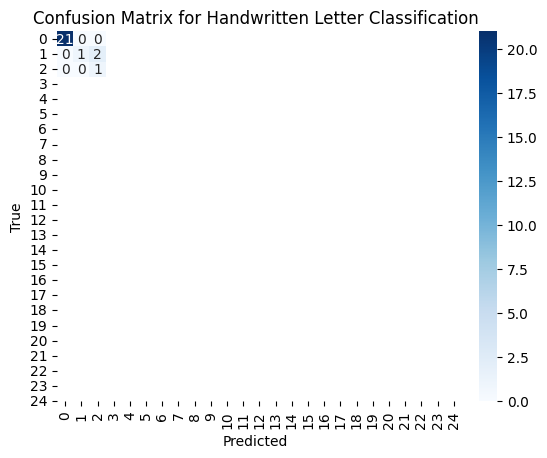

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, predicted_classes)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(25), yticklabels=range(25))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Handwritten Letter Classification')
plt.show()